In [ ]:
# !pip install -r requirements.txt

In [ ]:
import subprocess
import shutil

In [ ]:
# Clone the repository
subprocess.run(["git", "clone", "https://huggingface.co/datasets/dreamerdeo/multispider"], check=True)

# Move the directories
shutil.move("multispider/dataset", ".")
shutil.move("multispider/model", ".")

# Prepare the dataset

We're gonna separate the dataset into the folder of the different databases, to reduce the size of the dataset when working a given database.

We will keep the distinction between dev, train and examples sets

In [1]:
dataset_path = r"../multispider/multispider/dataset/multispider/with_original_value"
database_path = r"../multispider/multispider/dataset/spider/database"

On crée une liste des databases

Pour chaque fichier dans la liste suivante [dev_fr.json, train_fr.json] on effectue le traitement suivant:
- On ouvre le fichier
- on crée un dictionnaire avec comme clefs les noms des bases de données et une chaine de caractère vide comme valeur
- On parcourt les lignes du fichier Json en cherchant la partie "db_id"
- On ajoute la ligne dans le dictionnaire correspondant à la base de données
- Puis une fois le fichier parcouru, on écrit les lignes dans un nouveau fichier json dans le dossier correspondant à la base de données pour chaque base de données dans le dictionnaire, en conservant le nom du fichier original



In [9]:
import json
import os

def extract_database(file_path):
    with open(os.path.join(dataset_path, file_path), "r", encoding="utf-8") as file:
        data = json.load(file)
        databases = {}
        for line in data:
            db_id = line["db_id"]
            if db_id not in databases:
                databases[db_id] = []
            databases[db_id].append(line)
    return databases

def write_database(databases, file_path):
    for db_id, lines in databases.items():
        with open(os.path.join(database_path, db_id, file_path), "w", encoding="utf-8") as file:
            json.dump(lines, file)

def find_questions(databases):
    liste_questions = []
    for db_id, lines in databases.items():
        print(f"{db_id} has {len(lines)} questions")
        liste_questions.append(len(lines))
    return liste_questions

def print_statistics(liste_questions):
    # On affiche l'histogramme des questions et les statistiques de base
    import matplotlib.pyplot as plt
    import numpy as np
    print("\nStatistics:")
    print(f"\tMean: {np.mean(liste_questions)}")
    print(f"\tMedian: {np.median(liste_questions)}")
    print(f"\tStandard deviation: {np.std(liste_questions)}")
    print(f"\tMax: {np.max(liste_questions)}")
    print(f"\tMin: {np.min(liste_questions)}")
    plt.hist(liste_questions, bins=20)
    plt.show()
    
            
def extract_and_write_database(file_path):
    databases = extract_database(file_path)
    write_database(databases, file_path)
    liste_questions = find_questions(databases)
    print_statistics(liste_questions)
    
def extract_all_databases():
    for file in ["dev_fr.json", "train_fr.json"]:
        extract_and_write_database(file)
        

concert_singer has 45 questions
pets_1 has 42 questions
car_1 has 92 questions
flight_2 has 80 questions
employee_hire_evaluation has 38 questions
cre_Doc_Template_Mgt has 84 questions
course_teach has 30 questions
museum_visit has 18 questions
wta_1 has 62 questions
battle_death has 16 questions
student_transcripts_tracking has 78 questions
tvshow has 62 questions
poker_player has 40 questions
voter_1 has 15 questions
world_1 has 120 questions
orchestra has 40 questions
network_1 has 56 questions
dog_kennels has 82 questions
singer has 30 questions
real_estate_properties has 4 questions

Statistics:
	Mean: 51.7
	Median: 43.5
	Standard deviation: 29.621107339193113
	Max: 120
	Min: 4


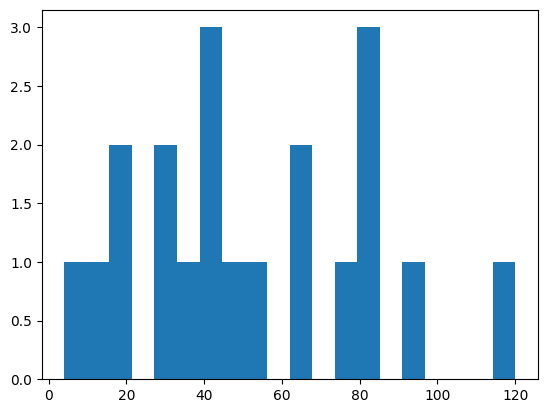

department_management has 16 questions
farm has 40 questions
student_assessment has 53 questions
bike_1 has 104 questions
book_2 has 21 questions
musical has 40 questions
twitter_1 has 27 questions
product_catalog has 42 questions
flight_1 has 96 questions
allergy_1 has 98 questions
store_1 has 112 questions
journal_committee has 18 questions
customers_card_transactions has 80 questions
race_track has 42 questions
coffee_shop has 18 questions
chinook_1 has 84 questions
insurance_fnol has 42 questions
medicine_enzyme_interaction has 44 questions
university_basketball has 46 questions
phone_1 has 29 questions
match_season has 58 questions
climbing has 40 questions
body_builder has 24 questions
election_representative has 20 questions
apartment_rentals has 80 questions
game_injury has 19 questions
soccer_1 has 14 questions
performance_attendance has 15 questions
college_2 has 170 questions
debate has 15 questions
insurance_and_eClaims has 40 questions
customers_and_invoices has 82 questio

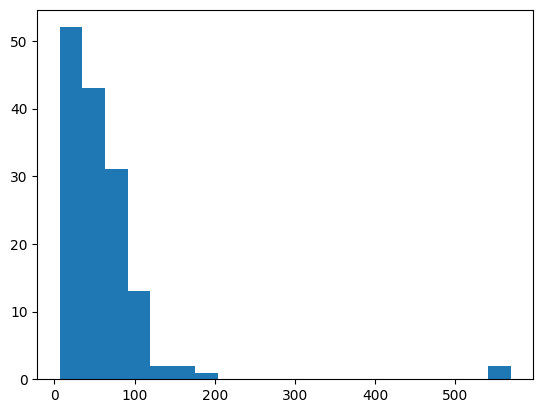

In [10]:
extract_all_databases()

In [13]:
# On fait la liste de toutes les bases de données avec un fichier train_fr.json, et celles avec un fichier dev_fr.json

def list_databases(file_path):
    with open(os.path.join(dataset_path, file_path), "r") as file:
        data = json.load(file)
        databases = set()
        for line in data:
            db_id = line["db_id"]
            databases.add(db_id)
    return databases

def list_all_databases():
    databases_dev = list_databases("dev_fr.json")
    databases_train = list_databases("train_fr.json")
    return databases_dev, databases_train

databases_dev, databases_train = list_all_databases()

In [14]:
# on cherche les databases qui sont dans les deux listes
databases_dev & databases_train

set()

In [15]:
# On enregistre les bases de données dans des fichiers JSON
with open("databases_dev.json", "w") as file:
    json.dump(list(databases_dev), file)

with open("databases_train.json", "w") as file:
    json.dump(list(databases_train), file)

On veut afficher un histogramme du nombre de tables par base de données, du nombre de lignes par table en moyenne, et du nombre de colonnes par table en moyenne

In [31]:
db_id = list(databases_dev)[0]


In [32]:
conn = sqlite3.connect(os.path.join(database_path, db_id, f"{db_id}.sqlite"))
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
tables = [table[0] for table in tables]
cursor.execute("SELECT * FROM sqlite_master WHERE type='table';")
table_info = cursor.fetchall()
table_info = [table[4] for table in table_info]
cursor.close()
conn.close()


In [34]:
tables

['museum', 'visitor', 'visit']

In [35]:
table_info

['CREATE TABLE "museum" (\n"Museum_ID" int,\n"Name" text,\n"Num_of_Staff" int,\n"Open_Year" text,\nPRIMARY KEY ("Museum_ID")\n)',
 'CREATE TABLE "visitor" (\n"ID" int,\n"Name" text,\n"Level_of_membership" int,\n"Age" int,\nPRIMARY KEY ("ID")\n)',
 'CREATE TABLE "visit" (\n"Museum_ID" int,\n"visitor_ID" text,\n"Num_of_Ticket" int,\n"Total_spent" real,\nPRIMARY KEY ("Museum_ID","visitor_ID"),\nFOREIGN KEY ("Museum_ID") REFERENCES `museum`("Museum_ID"),\nFOREIGN KEY ("visitor_ID") REFERENCES `visitor`("ID")\n)']

In [41]:
table_info[0].split("\nPRIMARY KEY")[0].count("\n")

4

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

def get_table_info(db_id):
    conn = sqlite3.connect(os.path.join(database_path, db_id, f"{db_id}.sqlite"))
    cursor = conn.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    tables = [table[0] for table in tables]
    cursor.execute("SELECT * FROM sqlite_master WHERE type='table';")
    table_info = cursor.fetchall()
    table_info = [table[4] for table in table_info]
    # Count the number of lines per table before closing the connexion
    nb_lines = []
    for table in tables:
        cursor.execute(f"SELECT COUNT(*) FROM {table}")
        a = cursor.fetchone()
        nb_lines.append(a[0])
    # print(f"Database {db_id}")
    # print(f"nb_lines: {nb_lines}")
    cursor.close()
    conn.close()
    return tables, table_info, nb_lines

def get_table_statistics(db_id):
    # print(f"Database {db_id}")
    tables, table_info, nb_rows = get_table_info(db_id)
    nb_tables = len(tables)
    # nb_rows = 0
    nb_columns = 0
    for table in table_info:
        # print(table)
        # nb_rows += table.count("\n") + 1
        nb_columns += table.split("\nPRIMARY KEY")[0].count("\n")
    # print(f"nb_tables: {nb_tables}, nb_rows: {nb_rows}, nb_columns: {nb_columns}")
    return nb_tables, np.mean(nb_rows) , nb_columns / nb_tables

def get_statistics(databases):
    nb_tables = []
    nb_rows = []
    nb_columns = []
    for db_id in databases:
        tables, rows, columns = get_table_statistics(db_id)
        nb_tables.append(tables)
        nb_rows.append(rows)
        nb_columns.append(columns)
    
    return nb_tables, nb_rows, nb_columns

def print_statistics(nb_tables, nb_rows, nb_columns):
    print("\nStatistics:")
    print(f"\tMean number of tables: {np.mean(nb_tables)}")
    print(f"\tMean number of rows per table: {np.mean(nb_rows)}")
    print(f"\tMean number of columns per table: {np.mean(nb_columns)}")
    print(f"\tMedian number of tables: {np.median(nb_tables)}")
    print(f"\tMedian number of rows per table: {np.median(nb_rows)}")
    print(f"\tMedian number of columns per table: {np.median(nb_columns)}")
    print(f"\tStandard deviation of the number of tables: {np.std(nb_tables)}")
    print(f"\tStandard deviation of the number of rows per table: {np.std(nb_rows)}")
    print(f"\tStandard deviation of the number of columns per table: {np.std(nb_columns)}")
    print(f"\tMax number of tables: {np.max(nb_tables)}")
    print(f"\tMax number of rows per table: {np.max(nb_rows)}")
    print(f"\tMax number of columns per table: {np.max(nb_columns)}")
    print(f"\tMin number of tables: {np.min(nb_tables)}")
    print(f"\tMin number of rows per table: {np.min(nb_rows)}")
    print(f"\tMin number of columns per table: {np.min(nb_columns)}")
    plt.hist(nb_tables, bins=20)
    plt.xlabel("Number of tables")
    plt.ylabel("Number of databases")
    plt.title("Histogram of the number of tables per database")
    plt.show()
    plt.hist(nb_rows, bins=20)
    plt.xlabel("Number of rows per table")
    plt.ylabel("Number of databases")
    plt.title("Histogram of the number of rows per table per database")
    plt.show()
    plt.hist(nb_columns, bins=20)
    plt.xlabel("Number of columns per table")
    plt.ylabel("Number of databases")
    plt.title("Histogram of the number of columns per table per database")
    plt.show()
    
def get_and_print_statistics(databases):
    nb_tables, nb_rows, nb_columns = get_statistics(databases)
    print_statistics(nb_tables, nb_rows, nb_columns)
    
def get_and_print_all_statistics():
    print("Dev:")
    get_and_print_statistics(databases_dev)
    print("\nTrain:")
    get_and_print_statistics(databases_train)
    

Dev:

Statistics:
	Mean number of tables: 4.05
	Mean number of rows per table: 8964.729166666668
	Mean number of columns per table: 6.485378787878787
	Median number of tables: 3.0
	Median number of rows per table: 11.5
	Median number of columns per table: 6.041666666666666
	Standard deviation of the number of tables: 2.0850659461993044
	Standard deviation of the number of rows per table: 38579.89004707449
	Standard deviation of the number of columns per table: 2.3573485359751705
	Max number of tables: 11
	Max number of rows per table: 177125.66666666666
	Max number of columns per table: 14.0
	Min number of tables: 2
	Min number of rows per table: 6.0
	Min number of columns per table: 3.3333333333333335


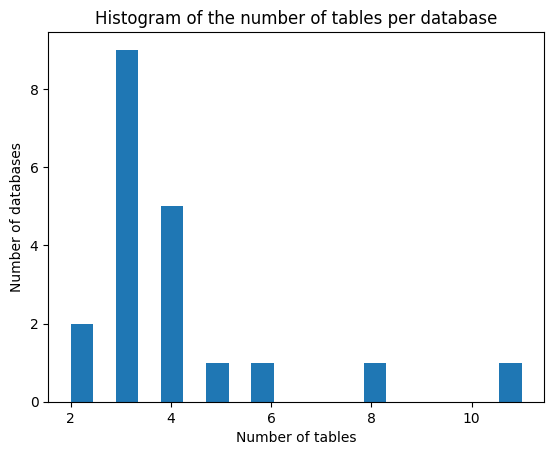

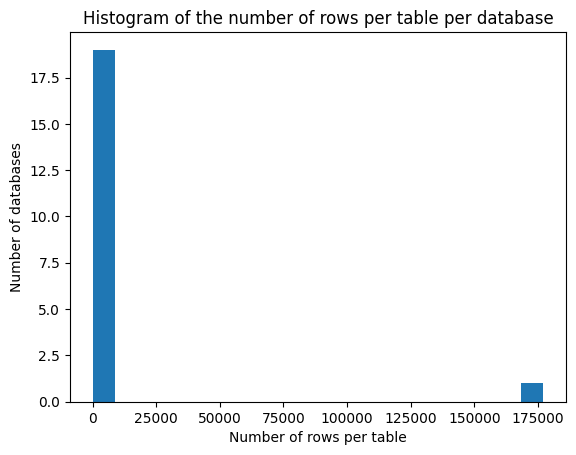

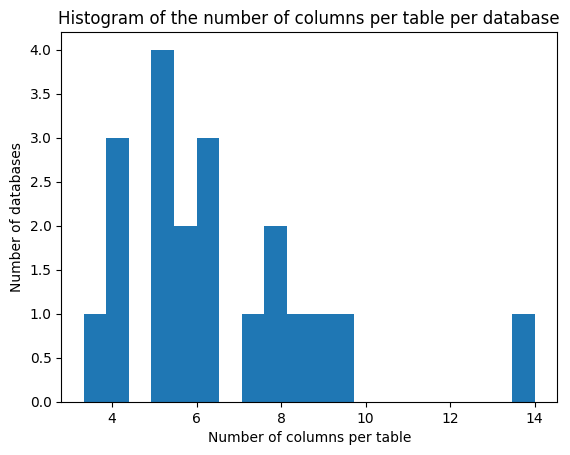


Train:

Statistics:
	Mean number of tables: 5.445205479452055
	Mean number of rows per table: 682.5750412924215
	Mean number of columns per table: 6.328388183353937
	Median number of tables: 4.0
	Median number of rows per table: 9.291666666666668
	Median number of columns per table: 6.038461538461538
	Standard deviation of the number of tables: 4.0137278506580465
	Standard deviation of the number of rows per table: 3698.256713191102
	Standard deviation of the number of columns per table: 2.077120952802432
	Max number of tables: 26
	Max number of rows per table: 28117.571428571428
	Max number of columns per table: 14.576923076923077
	Min number of tables: 2
	Min number of rows per table: 0.0
	Min number of columns per table: 2.125


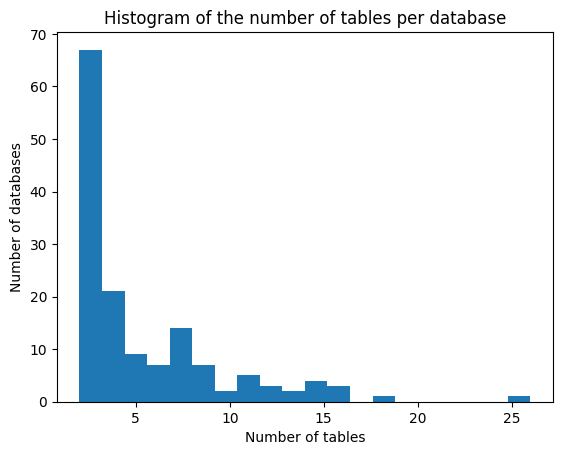

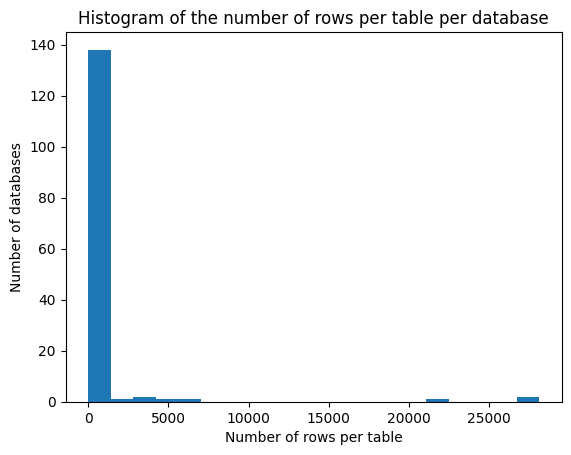

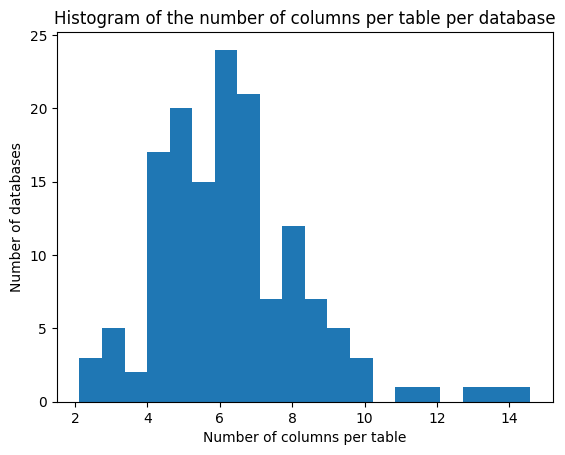

In [57]:
get_and_print_all_statistics()

On souhaite sélectionner les 10 bases de données avec le plus de tables, les 10 bases de données avec le plus de colonnes, et les 10 bases de données avec le plus de lignes, puis regarder l'intersection de ces trois listes

In [63]:
def top_ten(databases):
    nb_tables, nb_rows, nb_columns = get_statistics(databases)
    top_tables = sorted(zip(nb_tables, databases), reverse=True)[:10]
    top_rows = sorted(zip(nb_rows, databases), reverse=True)[:10]
    top_columns = sorted(zip(nb_columns, databases), reverse=True)[:10]
    inter_tables_rows = set([db for _, db in top_tables]) & set([db for _, db in top_rows])
    inter_tables_columns = set([db for _, db in top_tables]) & set([db for _, db in top_columns])
    inter_rows_columns = set([db for _, db in top_rows]) & set([db for _, db in top_columns])
    inter_all = inter_tables_rows & inter_tables_columns
    # print(f"Top ten databases with the most tables: {top_tables}")
    # print(f"Top ten databases with the most rows: {top_rows}")
    # print(f"Top ten databases with the most columns: {top_columns}")
    print(f"Intersection of the top ten databases with the most tables and the top ten databases with the most rows: {len(inter_tables_rows)}")
    print(f"Intersection of the top ten databases with the most tables and the top ten databases with the most columns: {len(inter_tables_columns)}")
    print(f"Intersection of the top ten databases with the most rows and the top ten databases with the most columns: {len(inter_rows_columns)}")
    print(f"Intersection of the top ten databases with the most tables, the top ten databases with the most rows and the top ten databases with the most columns: {inter_all}")
    return inter_all

inter_all_dev = top_ten(databases_dev)
inter_all_train = top_ten(databases_train)





# def get_and_print_statistics(databases):
#     nb_tables, nb_rows, nb_columns = get_statistics(databases)
#     print_statistics(nb_tables, nb_rows, nb_columns)

# def get_and_print_all_statistics():
#     print("Dev:")
#     get_and_print_statistics(databases_dev)
#     print("\nTrain:")
#     get_and_print_statistics(databases_train)

Intersection of the top ten databases with the most tables and the top ten databases with the most rows: 5
Intersection of the top ten databases with the most tables and the top ten databases with the most columns: 6
Intersection of the top ten databases with the most rows and the top ten databases with the most columns: 6
Intersection of the top ten databases with the most tables, the top ten databases with the most rows and the top ten databases with the most columns: {'wta_1', 'world_1', 'student_transcripts_tracking'}
Intersection of the top ten databases with the most tables and the top ten databases with the most rows: 3
Intersection of the top ten databases with the most tables and the top ten databases with the most columns: 2
Intersection of the top ten databases with the most rows and the top ten databases with the most columns: 5
Intersection of the top ten databases with the most tables, the top ten databases with the most rows and the top ten databases with the most column

On compte le nombre de questions liées aux bases de données dans les fichiers dev_fr.json et train_fr.json qui sont dans les intersections des trois listes précédentes

In [64]:
def count_questions(databases, file_path):
    with open(os.path.join(dataset_path, file_path), "r") as file:
        data = json.load(file)
        count = 0
        for line in data:
            db_id = line["db_id"]
            if db_id in databases:
                count += 1
    return count

def count_all_questions():
    count_dev = count_questions(inter_all_dev, "dev_fr.json")
    count_train = count_questions(inter_all_train, "train_fr.json")
    print(f"Number of questions in the intersection of the top ten databases with the most tables, the top ten databases with the most rows and the top ten databases with the most columns in dev_fr.json: {count_dev}")
    print(f"Number of questions in the intersection of the top ten databases with the most tables, the top ten databases with the most rows and the top ten databases with the most columns in train_fr.json: {count_train}")
    
count_all_questions()

Number of questions in the intersection of the top ten databases with the most tables, the top ten databases with the most rows and the top ten databases with the most columns in dev_fr.json: 260
Number of questions in the intersection of the top ten databases with the most tables, the top ten databases with the most rows and the top ten databases with the most columns in train_fr.json: 162
